# Assignment (Before Resubmit)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# File path
file_path = r"G:\Github Desktop Reps\Coding Dojo\Hypothesis-Testing-with-Insurance-Data--Core-\Data\insurance - insurance.csv"

# Read the CSV file into a dataframe named 'df'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to check
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Tests

## Q1. Do smokers have higher insurance charges than non-smokers?

1. Hypotheses:
- Null Hypothesis (H0): Smokers and non-smokers have the same average insurance charges.
- Alternative Hypothesis (H1): Smokers have different (in this case, higher) average insurance charges than non-smokers.
2. Test Selection:
We will use an independent t-test since we are comparing the means of two independent samples (smokers and non-smokers).

3. Test Assumptions:
- Independence of observations
- Normally distributed populations
- Equal variance (homogeneity of variances)

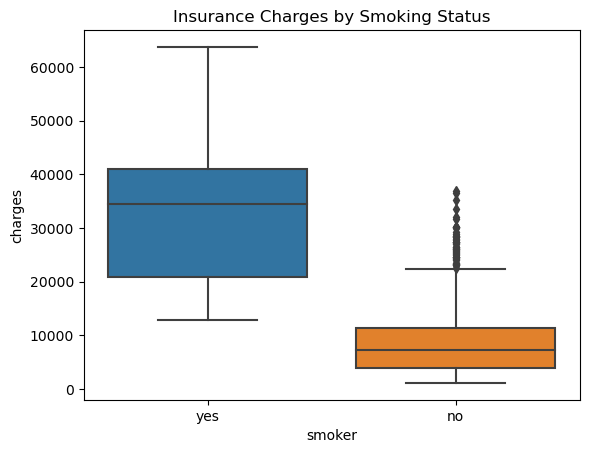

In [3]:
# Q1 Plot
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insurance Charges by Smoking Status')
plt.show()

In [4]:
# Checking for equal variance
print(stats.levene(df[df['smoker'] == 'yes']['charges'], df[df['smoker'] == 'no']['charges']))

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)


In [5]:
# Independent t-test
t_stat, p_val = stats.ttest_ind(df[df['smoker'] == 'yes']['charges'], df[df['smoker'] == 'no']['charges'], equal_var=True)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 46.66492117272371, P-value: 8.271435842179102e-283


### p value is less than .05 so we reject the null hypothesis.

## Q2. Are men more likely to smoke than women?
1. Hypotheses:
- Null Hypothesis (H0): The proportion of men who smoke is the same as the proportion of women who smoke.
- Alternative Hypothesis (H1): The proportion of men who smoke is different than the proportion of women who smoke.
2. Test Selection:
Chi-squared test for independence, since we're dealing with categorical data.

3. Test Assumptions:
- Observations used should be independent.
- Expected frequency count for each cell of the table should be at least 5.

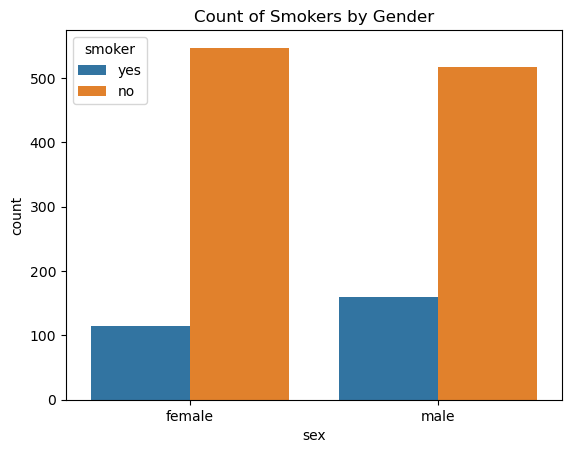

In [6]:
# Q2 Plot
sns.countplot(x='sex', hue='smoker', data=df)
plt.title('Count of Smokers by Gender')
plt.show()

In [7]:
# Crosstab for observed counts
observed = pd.crosstab(df['sex'], df['smoker'])
print(observed)

# Expected counts
expected = stats.chi2_contingency(observed)[3]
print(expected)

smoker   no  yes
sex             
female  547  115
male    517  159
[[526.43348281 135.56651719]
 [537.56651719 138.43348281]]


In [8]:
chi2_stat, p_val, _, _ = stats.chi2_contingency(observed)
print(f"Chi2 Statistic: {chi2_stat}, P-value: {p_val}")

Chi2 Statistic: 7.39291081459996, P-value: 0.006548143503580696


### Yes, men are more likely.

## Q3. Do different regions have different charges, on average?
1. Hypotheses:
- Null Hypothesis (H0): All regions have the same average insurance charges.
- Alternative Hypothesis (H1): At least one region has different average insurance charges.
2. Test Selection:
We'll use ANOVA since we're comparing means across multiple groups.

3. Test Assumptions:
- Independence of the observations
- Normally distributed residuals
- Homogeneity of variances

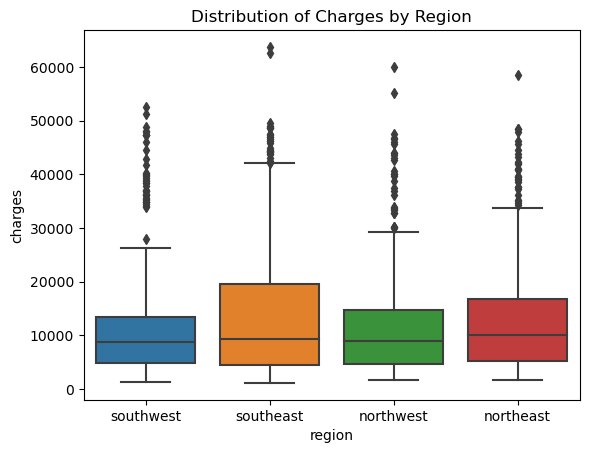

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)


In [9]:
sns.boxplot(data=df, x='region', y='charges')
plt.title('Distribution of Charges by Region')
plt.show()

# Checking for homogeneity of variances
regions = [df['charges'][df['region'] == region] for region in df['region'].unique()]
print(stats.levene(*regions))

In [10]:
f_stat, p_val = stats.f_oneway(*regions)
print(f"F-statistic: {f_stat}, P-value: {p_val}")

F-statistic: 2.96962669358912, P-value: 0.0308933560705201


### With a p-value of 0.03, we have sufficient evidence to reject the null hypothesis and conclude that the region does have an effect on the amount charged.

# Resubmit section

In [11]:
# Checking for normal distribution of data for smokers
_, p_val_smokers = stats.shapiro(df[df['smoker'] == 'yes']['charges'])
print(f"P-value for smokers' charges normality: {p_val_smokers}")

# Checking for normal distribution of data for non-smokers
_, p_val_non_smokers = stats.shapiro(df[df['smoker'] == 'no']['charges'])
print(f"P-value for non-smokers' charges normality: {p_val_non_smokers}")

# If p-value < 0.05, the distribution is not normal

P-value for smokers' charges normality: 3.6255991542333277e-09
P-value for non-smokers' charges normality: 1.4456512848762904e-28


In [12]:
# Checking for normality
for region in df['region'].unique():
    _, p_val = stats.shapiro(df['charges'][df['region'] == region])
    print(f"P-value for {region} charges normality: {p_val}")

# If any p-value < 0.05, the distribution for that region is not normal

P-value for southwest charges normality: 2.023667803366432e-20
P-value for southeast charges normality: 1.23268419436607e-19
P-value for northwest charges normality: 4.268387928586811e-19
P-value for northeast charges normality: 6.552730011610829e-18


In [13]:
h_stat, p_val = stats.kruskal(*regions)
print(f"H-statistic: {h_stat}, P-value: {p_val}")

# With a p-value < 0.05, I will reject the null hypothesis.

H-statistic: 4.734181215658743, P-value: 0.19232908072121002


In [14]:
# Checking for normal distribution of data for smokers
_, p_val_smokers = stats.shapiro(df[df['smoker'] == 'yes']['charges'])
print(f"P-value for smokers' charges normality: {p_val_smokers}")

P-value for smokers' charges normality: 3.6255991542333277e-09


In [15]:
# Checking for normal distribution of data for non-smokers
_, p_val_non_smokers = stats.shapiro(df[df['smoker'] == 'no']['charges'])
print(f"P-value for non-smokers' charges normality: {p_val_non_smokers}")

P-value for non-smokers' charges normality: 1.4456512848762904e-28


In [16]:
# Checking for normality
for region in df['region'].unique():
    _, p_val = stats.shapiro(df['charges'][df['region'] == region])
    print(f"P-value for {region} charges normality: {p_val}")

P-value for southwest charges normality: 2.023667803366432e-20
P-value for southeast charges normality: 1.23268419436607e-19
P-value for northwest charges normality: 4.268387928586811e-19
P-value for northeast charges normality: 6.552730011610829e-18


In [17]:
# Checking for homogeneity of variances
levene_stat, levene_p = stats.levene(*regions)
print(f"Levene's test - Statistic: {levene_stat}, P-value: {levene_p}")

Levene's test - Statistic: 5.559966758410606, P-value: 0.0008610590250786703


In [20]:
if levene_p < 0.05: # If Levene test is significant, use Kruskal-Wallis
    h_stat, p_val = stats.kruskal(*regions)
    print(f"Kruskal-Wallis H-statistic: {h_stat}, P-value: {p_val}")
else:
    f_stat, p_val = stats.f_oneway(*regions)
    print(f"F-statistic: {f_stat}, P-value: {p_val}")

Kruskal-Wallis H-statistic: 4.734181215658743, P-value: 0.19232908072121002
